In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os, sys, glob

In [3]:
files = glob.glob('/glade/campaign/cgd/tss/people/guoqiang/CTSM_CAMELS_proj/SA_HH_allbasins/level1/ctsm_outputs/iter0_trial0/lnd/hist/*h0*.nc')
files.sort()
ds = xr.open_mfdataset(files)

In [12]:
ds

<xarray.Dataset>
Dimensions:                        (levgrnd: 25, levsoi: 20, levlak: 10,
                                    levdcmp: 1, time: 132, hist_interval: 2,
                                    lndgrid: 627, cft: 64, glc_nec: 10,
                                    ltype: 9, natpft: 15, nvegwcs: 4)
Coordinates:
  * levgrnd                        (levgrnd) float32 0.01 0.04 ... 28.87 42.0
  * levsoi                         (levsoi) float32 0.01 0.04 0.09 ... 6.94 8.03
  * levlak                         (levlak) float32 0.05 0.6 2.1 ... 34.33 44.78
  * levdcmp                        (levdcmp) float32 1.0
  * time                           (time) object 2003-11-01 00:00:00 ... 2014...
Dimensions without coordinates: hist_interval, lndgrid, cft, glc_nec, ltype,
                                natpft, nvegwcs
Data variables: (12/264)
    mcdate                         (time) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    mcsec                          (time) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    mdcur                          (time) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    mscur                          (time) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    nstep                          (time) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    time_bounds                    (time, hist_interval) object dask.array<chunksize=(2, 2), meta=np.ndarray>
    ...                             ...
    SOILLIQ                        (time, levsoi, lndgrid) float32 dask.array<chunksize=(2, 20, 627), meta=np.ndarray>
    PCT_LANDUNIT                   (time, ltype, lndgrid) float32 dask.array<chunksize=(2, 9, 627), meta=np.ndarray>
    PCT_NAT_PFT                    (time, natpft, lndgrid) float32 dask.array<chunksize=(2, 15, 627), meta=np.ndarray>
    VEGWP                          (time, nvegwcs, lndgrid) float32 dask.array<chunksize=(2, 4, 627), meta=np.ndarray>
    VEGWPLN                        (time, nvegwcs, lndgrid) float32 dask.array<chunksize=(2, 4, 627), meta=np.ndarray>
    VEGWPPD                        (time, nvegwcs, lndgrid) float32 dask.array<chunksize=(2, 4, 627), meta=np.ndarray>
Attributes: (12/99)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              created on 02/04/24 22:27:18
    source:                               Community Terrestrial Systems Model
    hostname:                             derecho
    ...                                   ...
    cft_irrigated_switchgrass:            60
    cft_tropical_corn:                    61
    cft_irrigated_tropical_corn:          62
    cft_tropical_soybean:                 63
    cft_irrigated_tropical_soybean:       64
    time_period_freq:                     month_1

In [37]:
# var = 'SNOW'
var = 'H2OSNO'
tarvar = ds[var]

In [38]:
tarvar.load()

<xarray.DataArray 'H2OSNO' (time: 132, lndgrid: 627)>
array([[1.0275387e+00, 5.2203826e-04, 1.3682755e+00, ..., 1.2769708e-06,
        1.2765890e-05, 2.3632577e-08],
       [1.2264180e+01, 2.2535633e-02, 4.1098306e-01, ..., 6.3094276e-01,
        4.6387678e-01, 1.5639880e-01],
       [8.8535332e+01, 9.0905670e+01, 1.0246364e+02, ..., 2.4457767e+00,
        8.1124306e+00, 2.1902418e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.8861241e-06, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)
Coordinates:
  * time     (time) object 2003-11-01 00:00:00 ... 2014-10-01 00:00:00
Dimensions without coordinates: lndgrid
Attributes:
    long_name:      snow depth (liquid water)
    units:          mm
    cell_methods:   time: mean
    landunit_mask:  unknown

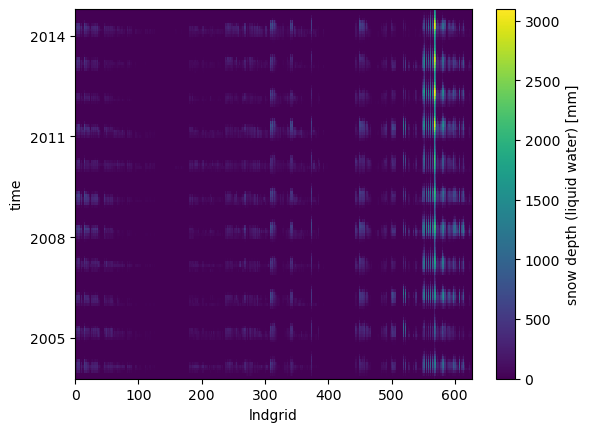

In [39]:
tarvar.plot()

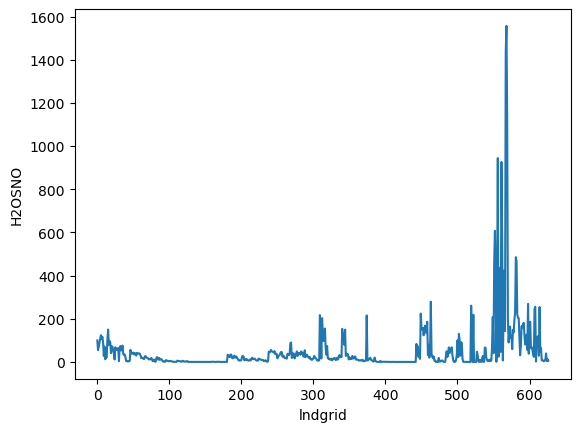

In [40]:
tarvar.mean(dim='time').plot()

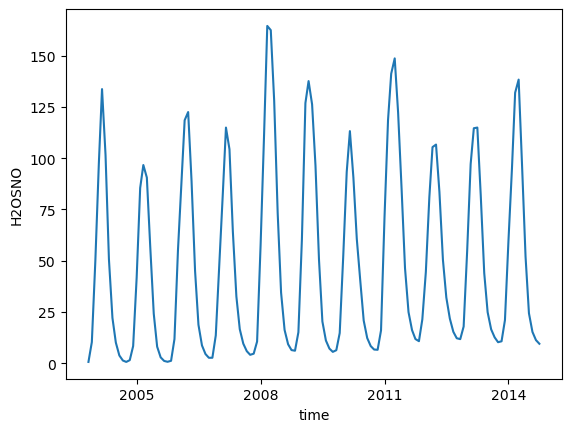

In [41]:
tarvar.mean(dim='lndgrid').plot()

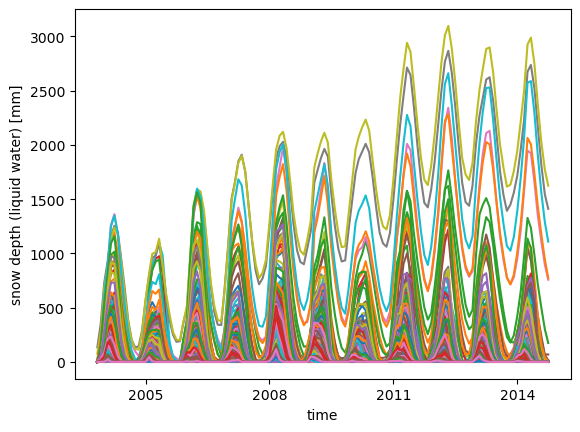

In [42]:
for i in range(627):
    tarvar.sel(lndgrid=i).plot()

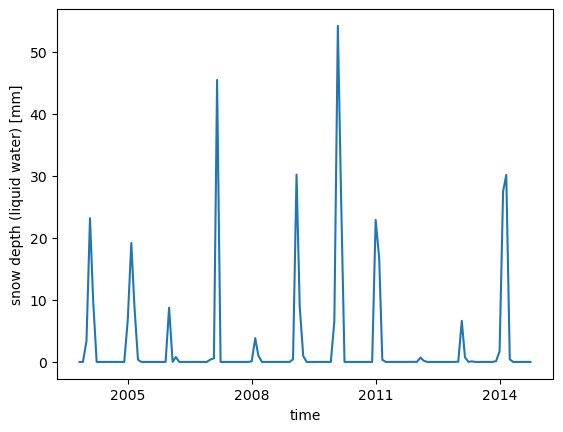

In [47]:
tarvar.isel(lndgrid=100).plot()

In [60]:
np.where(tarvar.mean(dim='time')>1000)[0]

array([567, 568, 569])

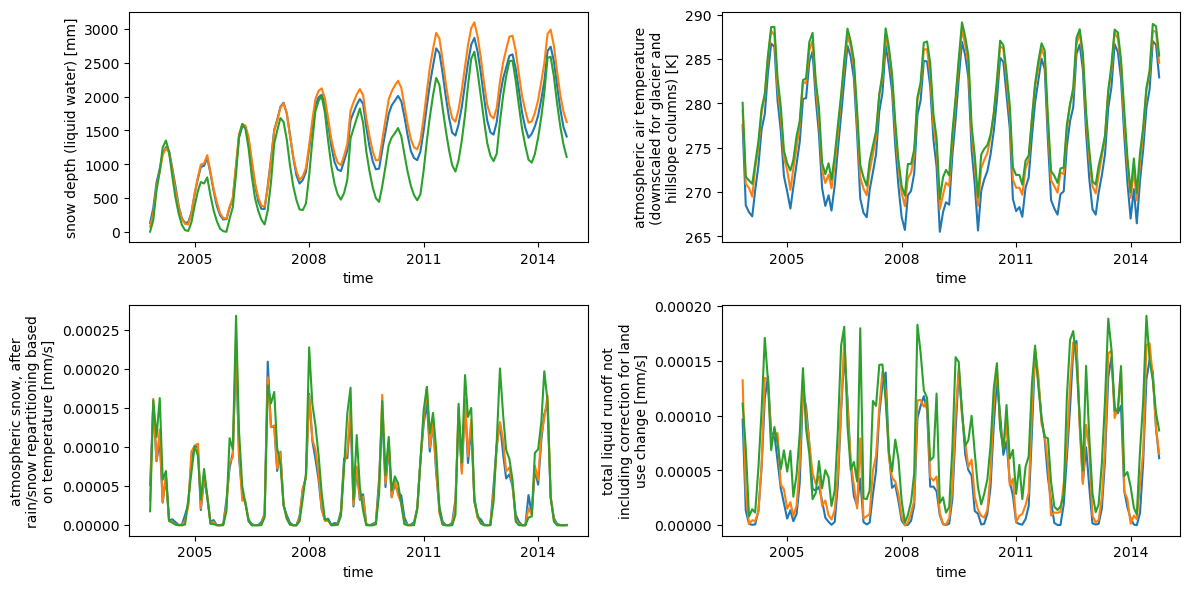

In [76]:
fig = plt.figure(figsize=[12, 6])

fig.add_subplot(2,2,1)
for i in [567, 568, 569]:
    tarvar.isel(lndgrid=i).plot()

fig.add_subplot(2,2,2)
for i in [567, 568, 569]:
    ds.TBOT.isel(lndgrid=i).plot()

fig.add_subplot(2,2,3)
for i in [567, 568, 569]:
    ds.SNOW.isel(lndgrid=i).plot()

fig.add_subplot(2,2,4)
for i in [567, 568, 569]:
    ds.QRUNOFF.isel(lndgrid=i).plot()

plt.tight_layout()

In [67]:
for i in [567, 568, 569]:
    for vin in ['lat','lon','area']:
        print(i, vin, ds[vin].isel(lndgrid=i, time=0).values)

567 lat 48.576252
567 lon 238.96712
567 area 272.71387
568 lat 48.612156
568 lon 238.78145
568 area 69.09815
569 lat 48.052113
569 lon 238.66844
569 area 395.30228
